# Introdução

**Heart Disease Dataset**

O tema do nosso trabalho é sobre o dataset **Heart Disease Dataset** do ano de 1988 que tem quatro bancos de dados: **Cleveland, Hungria, Suíça e Long Beach V**.  

A base de dados do dataset é relacionada a dados experimentais com pacientes sobre doença cardíaca. Ele contém 76 atributos, porém todos os experimentos publicados são referentes ao subconjunto de 14 deles, todos do banco de dados **Cleveland**, os quais vamos analisar.  

O campo "target" do dataset é referente à presença de cardiopatia no paciente. Este campo pode ter o valor 0 (zero) ou 1 (um), sendo que o valor 0 (zero) é para pacientes que não tem a doença de cardiopatia e 1, para quem tem a doença de cardiopatia.  

O dataset usado foi extraído do site **Kaggle** <https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download&select=heart.csv>, que é um site que disponibiliza vários dataset, porém existe vários sites que publicam o mesmo dataset, como por exempo o site **UC Irvine Machine Learning Repository** <https://archive.ics.uci.edu/dataset/45/heart+disease>.  

## Origem dos dados

O Dataset é de 1988.  
O repositório não indica quem fez a pesquisa nem os motivos da realização da pesquisa.

## Composição dos dados

O dataset a ser analisado possui 1025 observações e 14 variáveis:  
* 13 variáveis do tipo “int64”: age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, slope, ca, thal e target; e
* 1 variável do tipo “float64”: “oldpeak”.  

O dataset total possui 76 atributos.  
Todos experimentos publicados são ref. a um subset com 14 variáveis (banco de dados Cleveland).  
A lista das variáveis que descrevemos abaixo, são referentes aos exames realizados nos pacientes e referentes ao estado de saúde deles:  
1. **age**: idade em anos;  
2. **sex**: sexo (1 = masculino, 0 = feminino);  
3. **cp**: tipo de dor no peito:  
    -- 1: angina típica  
    -- 2: angina atípica  
    -- 3: dor não anginosa  
    -- 4: assintomático  
4. **trestbps**: pressão arterial em repouso (em mm Hg na admissão ao hospital);
5. **chol**: colesterol sérico em mg/dl;  
6. **fbs**: glicemia em jejum > 120 mg/dl: 1 = verdadeiro, 0 = falso;  
7. **restecg**: resultados eletrocardiográficos em repouso:  
    -- 0: normal  
    -- 1: com anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão do segmento ST > 0,05 mV)  
    -- 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes  
8. **thalach**: frequência cardíaca máxima alcançada;  
9. **exang**: angina induzida por exercício (1 = sim; 0 = não);  
10. **oldpeak**: depressão de ST (ECG) induzida por exercício em relação ao repouso;  
11. **slope**: a inclinação do pico do segmento ST do exercício:  
    -- 1: ascendente  
    -- 2: plano  
    -- 3: descendente  
12. **ca**: número de vasos principais (0-3) coloridos por fluoroscopia;  
13. **thal**: talassemia cardíaca:  
    -- 0 = normal  
    -- 1 = defeito corrigido  
    -- 2 = defeito reversível  
14. **target**: presença de doença cardíaca no paciente:  
    -- 0 = sem doença  
    -- 1 = doença

# Etapa 1: Perguntar - Definir as questões

Nesta etapa as seguintes perguntas foram elaboradas para serem respondidas a partir dos dados escolhidose que podessem ser respondidas utilizando:  
	a. Teste de hipóteses;  
	b. Aprendizado de máquina supervisionado;  
	c. Aprendizado de máquina não supervisionado.  

**Pergunta 1**: Como a dor no peito está relacionada com doenças cardíacas e quem é mais propenso a ter?  

**Pergunta 2**: Quais as características dos pacientes que possam ter doenças cardíacas?  

**Pergunta**: É possível identificar grupos de pacientes com perfis semelhantes?  

# Etapa 2: Preparar - Coletar os dados

**Site do dataset**

Heart Disease Dataset: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download&select=heart.csv

## Importando bibliotecas e dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
# carregar o drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# ler arquivo csv
df = pd.read_csv('/content/drive/MyDrive/datasets/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## Detalhes das variáveis (colunas)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.columns  # list of columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.info()   # non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


**Tipos de variáveis**  
Das 14 variáveis: apenas uma é do tipo float e o restante é do tipo inteiro.

# Etapa 3: Processar - Limpar os dados

## Carregando os dados

In [ ]:
df.isnull().sum()   # sum of the values null

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Obs.**: o dataframe não tem valores nulos.

# Etapa 4: Analisar os dados

In [ ]:
df.describe()   # numeric variables

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# quantidade de linhas e colunas
df.shape

(1025, 14)

O dataset tem 1025 linhas e 14 colunas

## Pergunta 1 - Análises

### Como a dor no peito está relacionada com doenças cardíacas e quem é mais propenso a ter?

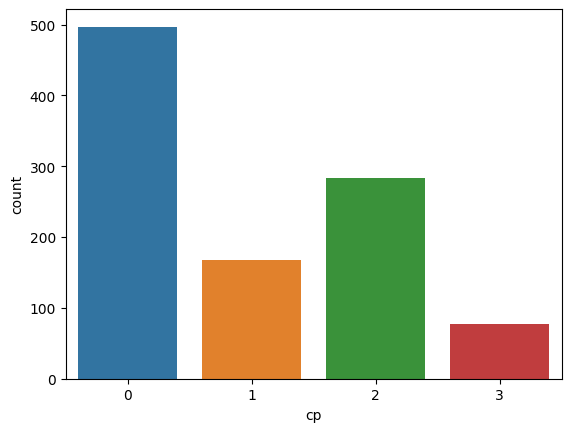

In [ ]:
#Quais são os diferentes tipos de dor no peito?
sns.countplot(data=df, x="cp");

- 0: Angina típica - dor no peito relacionada à diminuição do suprimento de sangue para o coração

- 1: Angina Atípica - dor no peito não relacionada ao coração

- 2: Dor não anginosa - tipicamente espasmos esofágicos (não relacionados ao coração)

- 3: Assintomático - dor no peito sem sinais de doença

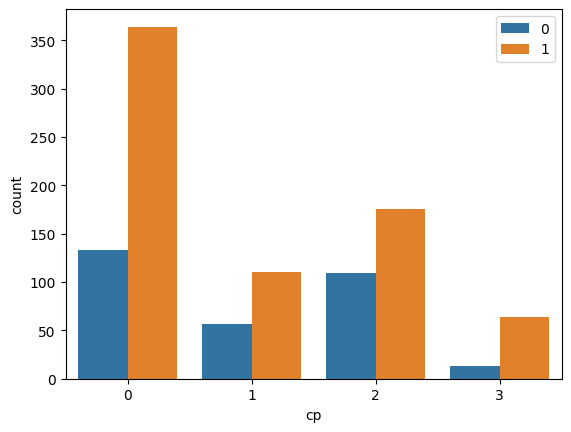

In [ ]:
#Quem é mais propenso a dor no peito pacientes do sexo masculino ou feminino?
sns.countplot(data=df, x="cp", hue="sex")
plt.legend(loc="upper right");

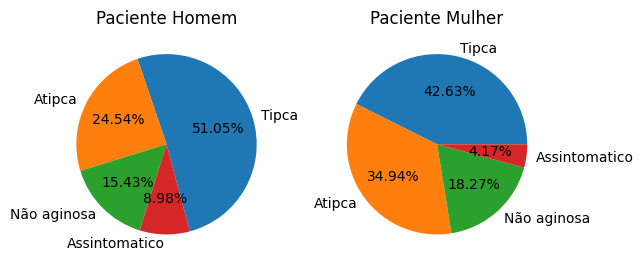

In [ ]:
labels = ["Tipca", "Atipca", "Não aginosa", "Assintomatico"]
sex = ["Male", "Female"]
male = df[df["sex"] == 1]["cp"].value_counts()
female = df[df["sex"] == 0]["cp"].value_counts()

plt.subplot(1, 2, 1)
plt.pie(
    male,
    labels=labels,
    autopct="%.2f%%",
    startangle=-75
)
plt.title(
    "Paciente Homem"
)

plt.subplot(1, 2, 2)
plt.pie(
    female,
    labels=labels,
    autopct="%.2f%%"
)
plt.title(
    "Paciente Mulher"
);

Pacientes do sexo masculino são mais propensos a dor no peito.

A maioria dos pacientes apresenta dor torácica típica de angina.

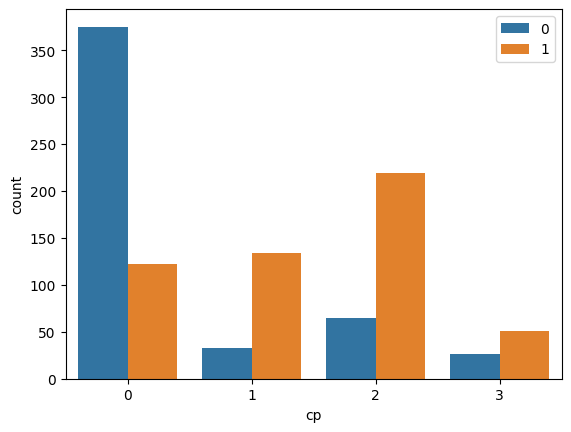

In [ ]:
#Como a dor no peito está relacionada com doenças cardíacas?
sns.countplot(data=df, x="cp", hue="target")
plt.legend(loc="upper right");

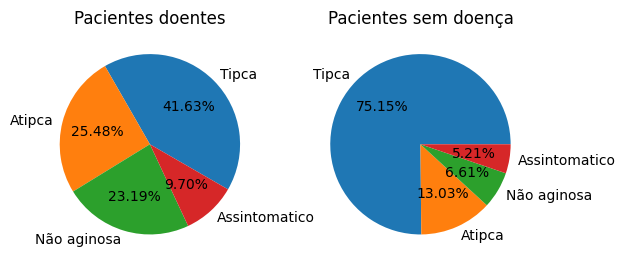

In [ ]:
labels = ["Tipca", "Atipca", "Não aginosa", "Assintomatico"]
sex = ["Com Doença", "Sem Doença"]
com_doenca = df[df["target"] == 1]["cp"].value_counts()
sem_doenca = df[df["target"] == 0]["cp"].value_counts()

plt.subplot(1, 2, 1)
plt.pie(
    com_doenca,
    labels=labels,
    autopct="%.2f%%",
    startangle=-30
)
plt.title(
    "Pacientes doentes"
)

plt.subplot(1, 2, 2)
plt.pie(
    sem_doenca,
    labels=labels,
    autopct="%.2f%%"
)
plt.title(
    "Pacientes sem doença"
);

Pacientes com dor típica de angina são menos propensos a ter doenças cardíacas.

Pacientes com dor não anginosa provavelmente têm doença cardíaca.


## Pergunta 2 - Análises

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

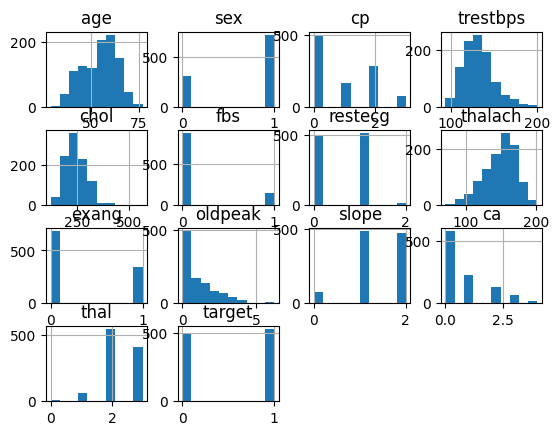

In [ ]:
df.hist()

### Quais as características dos pacientes que possam ter doenças cardíacas?

**Histrograma: quantidade x idade**

<Axes: xlabel='age', ylabel='Count'>

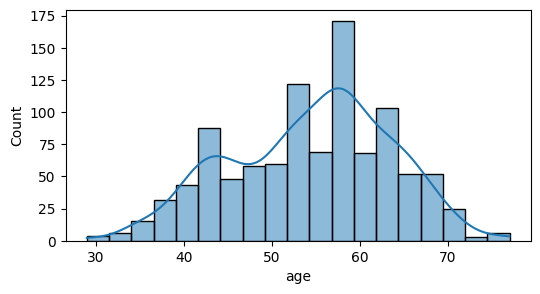

In [ ]:
plt.figure(figsize=(6, 3))
sns.histplot(df.age, kde=True)

A maior parte dos pacientes estão entre 55 anos e 60 anos de idade.  
A idade é o fator de risco mais importante em doenças do coração.

**Heatmap - matriz de correlação**

<Axes: >

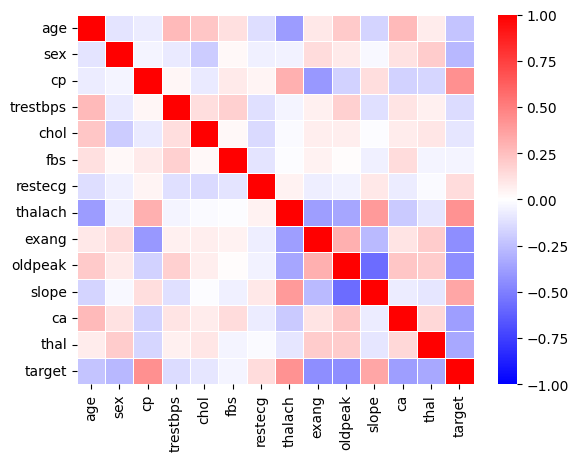

In [ ]:
corr_matrix = df.corr()
labels = df.columns
sns.heatmap(
    corr_matrix,
    linewidth=.5,
    fmt=".1f",
    vmin=-1,
    vmax=1,
    cmap='bwr',
    xticklabels=labels,
    yticklabels=labels,
)

**Métodos de aprendizado de máquina**

**Método utilizado**: Supervisionado.  
**Aprendizado supervisionado**: utiliza conjuntos de dados rotulados  que são utilizados para o treinamento de algoritmos para classificar dados ou prever resultados com precisão.  

**Objetivo**.:  
A idéia principal é criar um modelo de aprendizagem de máquina que consiga classificar os pacientes que tem presença ou não da doença cardíaca.  

**Organizando os dados**

 * Separar os rótulos dos dados.  
 * Os rótulos serão colocados na variável "y" e os dados na variável "X".  


In [ ]:
# X armazenerá os dados: seleção das colunas, exceto a última
X = df.iloc[:, 0:13]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [ ]:
# Y armazenerá os rótulos: seleção da última
y = df.target
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

**Separação dos dados de treinamento e de teste**

* Dados de treino: parte do dataframe que será utilizado para treinar o modelo de classificação.  
* Dados de teste: parte do dataframe que será utilizado para avaliar a performance do modelo gerado.


In [ ]:
# 35% dos dados serão utilizados para teste
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35, random_state=1234)

In [ ]:
# 666 linhas serão utlizadas para treino
X_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000
mean,54.503003,0.698198,0.950450,131.801802,246.106607,0.136637,0.539039,148.313814,0.333333,1.102553,1.369369,0.761261,2.333333
std,8.832143,0.459385,1.032819,17.614239,50.681957,0.343721,0.530973,23.017856,0.471759,1.167805,0.612078,1.034038,0.625282
min,34.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,165.000000,1.000000,1.800000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [ ]:
# 359 linhas serão utlizadas para teste
X_test.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000
mean,54.306407,0.690808,0.927577,131.259053,245.802228,0.172702,0.512535,150.598886,0.342618,1.013928,1.415042,0.740947,2.306407
std,9.513045,0.462806,1.024991,17.353288,53.311799,0.378517,0.522386,22.941280,0.475247,1.187870,0.627932,1.026068,0.612476
min,29.000000,0.000000,0.000000,94.000000,141.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,207.000000,0.000000,0.000000,139.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.600000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,277.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [ ]:
# rótulos de treino
y_train.value_counts()

1    341
0    325
Name: target, dtype: int64

In [ ]:
# rótulos de testes
y_test.value_counts()

1    185
0    174
Name: target, dtype: int64

#### 2.1 Geração do modelo de aprendizado de máquina - Modelo de Classificação GaussianNB

In [ ]:
# Importar a biblioteca de ML
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Criar uma instância do modelo
model_gau = GaussianNB()

In [ ]:
# Fit Model
model_gau.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predição do rótulo target
pred_gau = model_gau.predict(X_test)
pred_gau

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,

**Avaliação da performance do modelo GaussianNB**

In [ ]:
# Quantidade dos dados preditos que são iguais ao rótulo dos dados
sum(y_test == pred_gau)

298

In [ ]:
# Acurácia: cálculo da precisão de previsões corretas
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_gau)

0.83008356545961

In [ ]:
# Porcentagem dos dados preditos que são iguais com o rótulo dos dados
sum(y_test == pred_gau)/len(pred_gau)

0.83008356545961

#### 2.2 Geração do modelo de aprendizado de máquina - Modelo de Classificação SVC

In [ ]:
# Importar a biblioteca de ML
from sklearn.svm import SVC

In [ ]:
# Criar uma instância do modelo
model_svc = SVC()

In [ ]:
# Fit Model
model_svc.fit(X_train, y_train)

SVC()

In [ ]:
# Predição do rótulo target
pred_svc = model_svc.predict(X_test)
pred_svc

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

**Avaliação da performance do modelo SVC**

In [ ]:
# Quantidade dos dados preditos que são iguais ao rótulo dos dados
sum(y_test == pred_svc)

255

In [ ]:
# Acurácia: cálculo da precisão de previsões corretas
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_svc)

0.7103064066852368

In [ ]:
# Porcentagem dos dados preditos que são iguais com o rótulo dos dados
sum(y_test == pred_svc)/len(pred_svc)

0.7103064066852368

#### 2.3 Análise da Regressão Linear

**Características de pacientes que possam ter doenças cardíacas**

In [ ]:
# Visialização dos dados
from sklearn import datasets
df_reg = df
X_reg = df_reg.drop("target", axis=1)
y_reg = df_reg.target

print('Shape of data:', X_reg.shape, y_reg.shape)

Shape of data: (1025, 13) (1025,)


In [ ]:
print('Feature names:',df_reg.columns)

Feature names: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


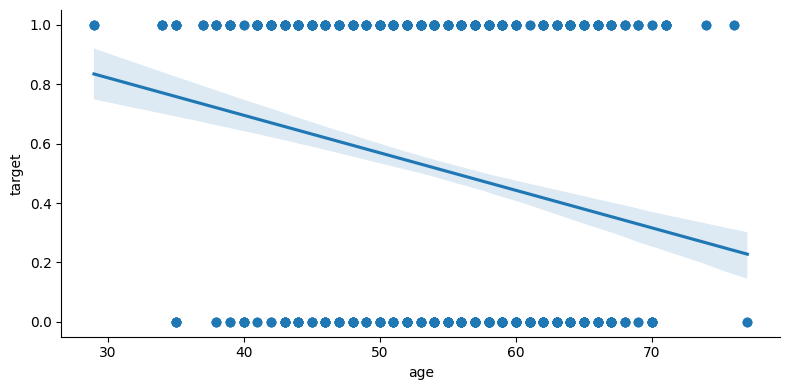

In [ ]:
# Visualização da relação entre 'idade' e 'doença cardíaca'
sns.lmplot(x = "age", y =  "target", data = df_reg, height = 4, aspect = 2);

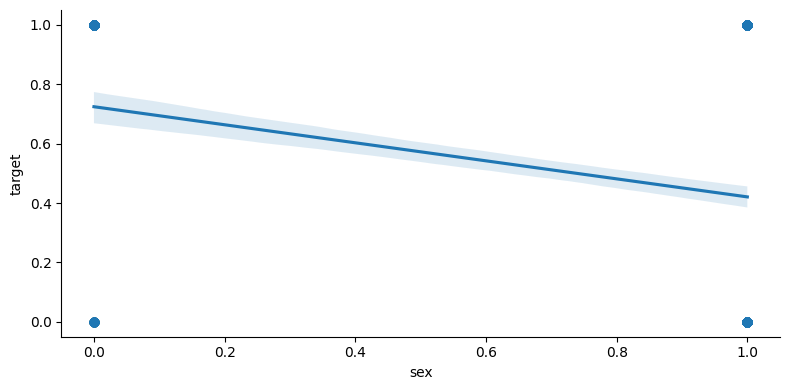

In [ ]:
# Visualização da relação entre 'sexo' e 'doença cardíaca'
sns.lmplot(x = "sex", y =  "target", data = df_reg, height = 4, aspect = 2);

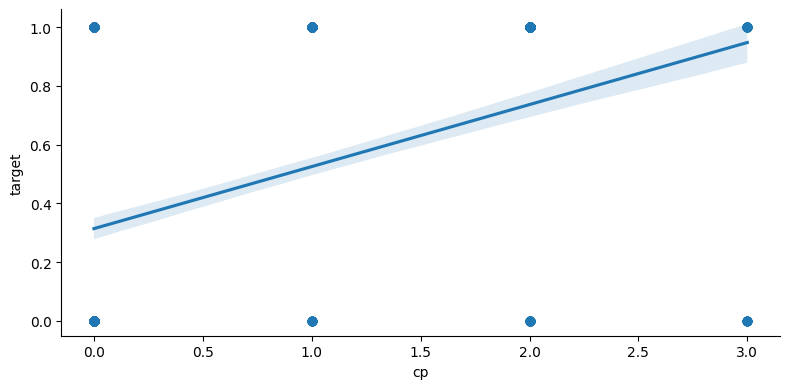

In [ ]:
# Visualização da relação entre 'tipo de angina (dor no peito)' e 'doença cardíaca'
sns.lmplot(x = "cp", y =  "target", data = df_reg, height = 4, aspect = 2);

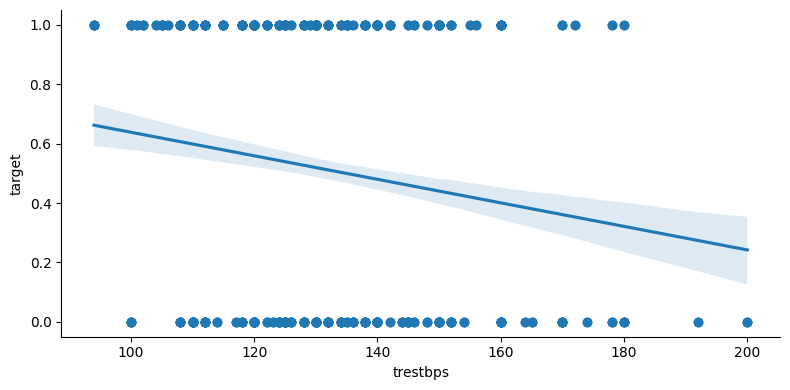

In [ ]:
# Visualização da relação entre 'pressão arterial' e 'doença cardíaca'
sns.lmplot(x = "trestbps", y =  "target", data = df_reg, height = 4, aspect = 2);

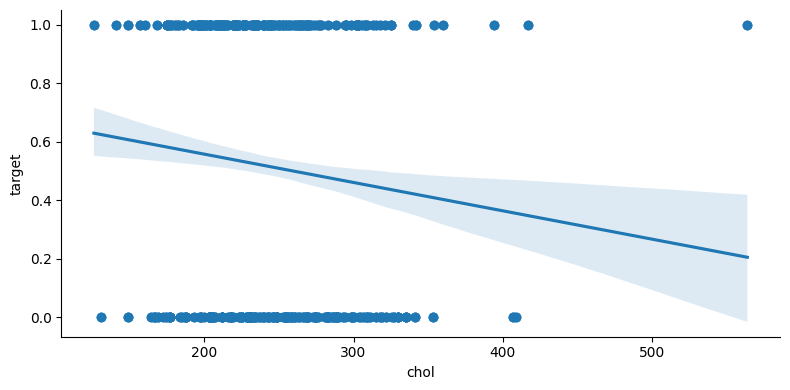

In [ ]:
# Visualização da relação entre 'colesterol' e 'doença cardíaca'
sns.lmplot(x = "chol", y =  "target", data = df_reg, height = 4, aspect = 2);

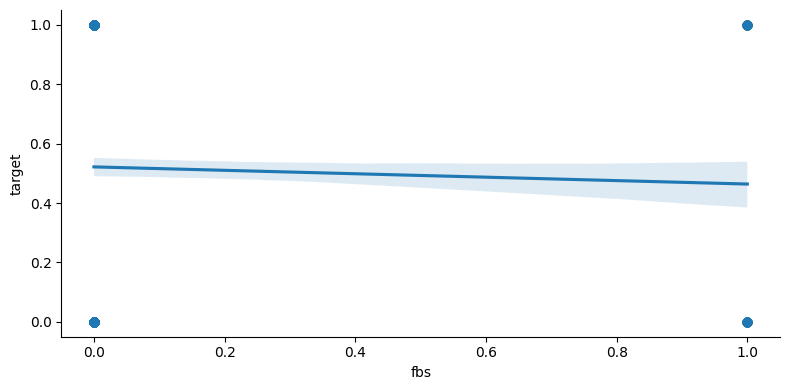

In [ ]:
# Visualização da relação entre 'glicemia em jejum' e 'doença cardíaca'
sns.lmplot(x = "fbs", y =  "target", data = df_reg, height = 4, aspect = 2);

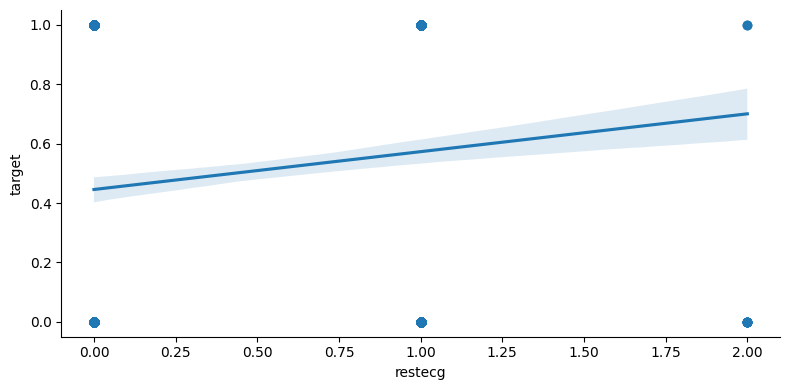

In [ ]:
# Visualização da relação entre 'ECG - Eletrocardiograma' e 'doença cardíaca'
sns.lmplot(x = "restecg", y =  "target", data = df_reg, height = 4, aspect = 2);

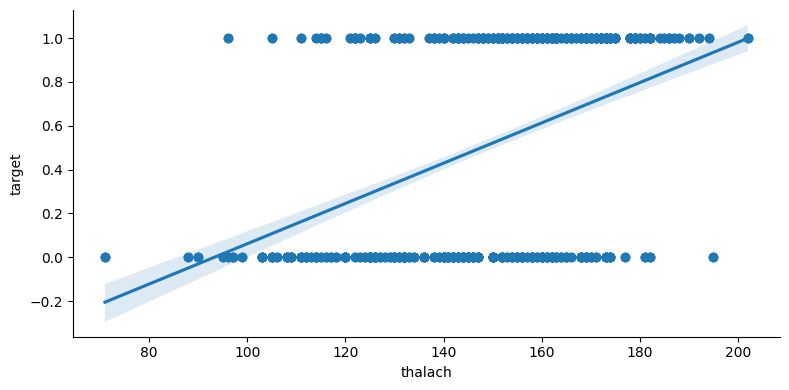

In [ ]:
# Visualização da relação entre 'Frequência Cardíaca Máxima' e 'doença cardíaca'
sns.lmplot(x = "thalach", y =  "target", data = df_reg, height = 4, aspect = 2);

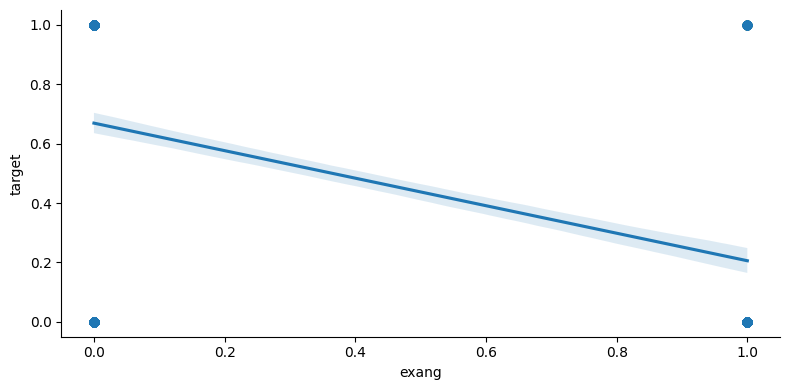

In [ ]:
# Visualização da relação entre 'Angina induzida por exercício' e 'doença cardíaca'
sns.lmplot(x = "exang", y =  "target", data = df_reg, height = 4, aspect = 2);

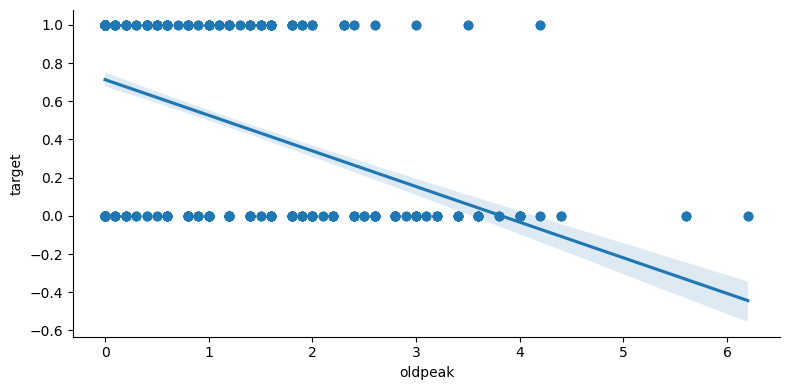

In [ ]:
# Visualização da relação entre 'Dressão de ST (ECG) - exercício' e 'doença cardíaca'
sns.lmplot(x = "oldpeak", y =  "target", data = df_reg, height = 4, aspect = 2);

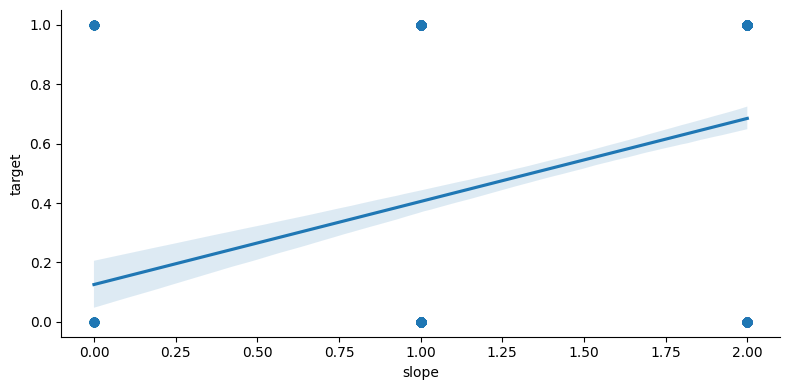

In [ ]:
# Visualização da relação entre 'Inclinação do pico do seg. ST do exerc.' e 'doença cardíaca'
sns.lmplot(x = "slope", y =  "target", data = df_reg, height = 4, aspect = 2);

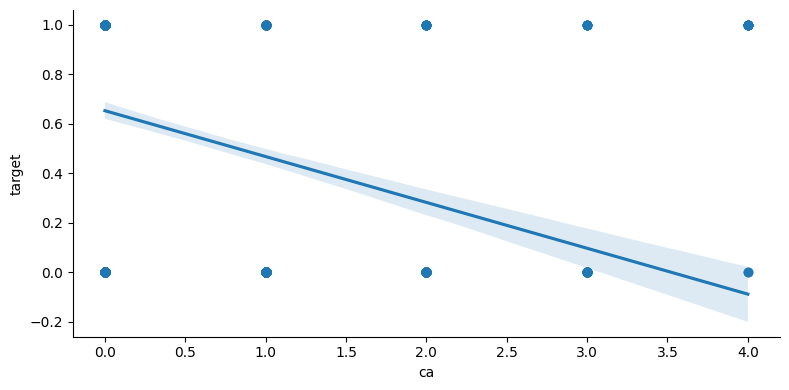

In [ ]:
# Visualização da relação entre 'Nº de vasos principais - corolidos por fluoroscopia' e 'doença cardíaca'
sns.lmplot(x = "ca", y =  "target", data = df_reg, height = 4, aspect = 2);

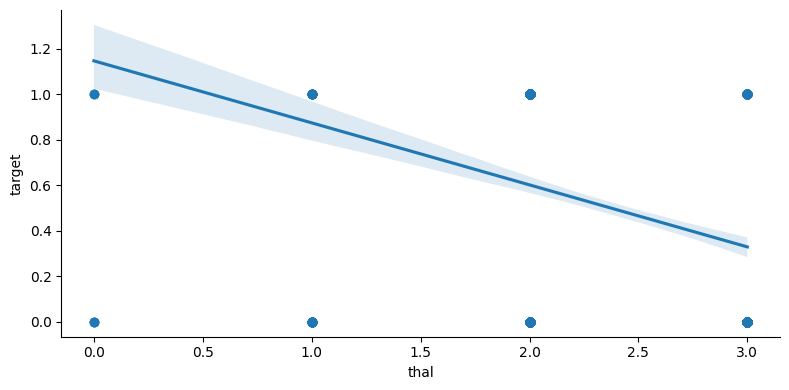

In [ ]:
# Visualização da relação entre 'Talassemia cardíaca' e 'doença cardíaca'
sns.lmplot(x = "thal", y =  "target", data = df_reg, height = 4, aspect = 2);

## Pergunta 3 - Análises

### É possível identificar grupos de pacientes com perfis semelhantes?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


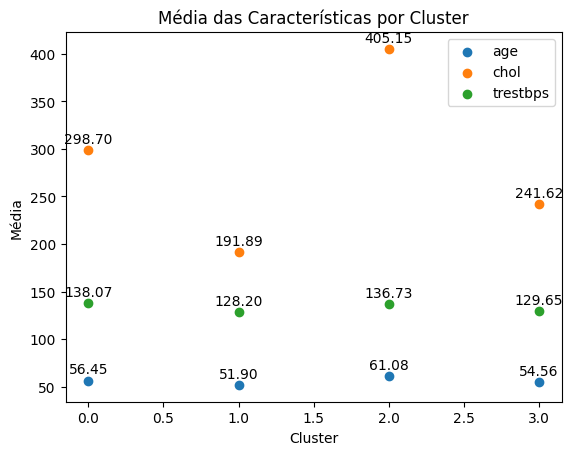

In [ ]:
# fazer suas análises aqui
# Selecionar apenas as colunas desejadas
selected_columns = ['age', 'chol', 'trestbps']
data_selected = df[selected_columns]

# Aplicar a normalização aos dados, se necessário
# data_selected = (data_selected - data_selected.mean()) / data_selected.std()

# Definir o número de clusters desejados
n_clusters = 4

# Criar o modelo de clusterização usando o algoritmo K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data_selected)

# Adicionar as informações dos clusters ao conjunto de dados original
df['cluster'] = kmeans.labels_

# Calcular as médias separadamente para cada cluster
cluster_means = df.groupby('cluster')[selected_columns].mean()

# Preparar o gráfico de pontos
fig, ax = plt.subplots()

# Plotar o gráfico de pontos com as médias
for i, col in enumerate(selected_columns):
    ax.scatter(cluster_means.index, cluster_means[col], label=col)

# Configurar os eixos e rótulos
plt.xlabel('Cluster')
plt.ylabel('Média')
plt.title('Média das Características por Cluster')
plt.legend()

# Exibir os valores exatos nas coordenadas dos pontos
for i, col in enumerate(selected_columns):
    for cluster_id, mean_val in zip(cluster_means.index, cluster_means[col]):
        ax.annotate(f'{mean_val:.2f}', (cluster_id, mean_val), textcoords="offset points", xytext=(0,5), ha='center')

# Mostrar o gráfico
plt.show()

# Etapa 5: Compartilhar os resultados (insights)

1) Pacientes com dor não anginosa provavelmente podem desenvolver uma doença cardíaca. E os pacientes femininos são os que apresentaram mais esse tipo de dor.

2) As 3 principais características de pacientes com predição a ter doenças cardíacas são os que apresentam sintomas de: angina (dor no peito - variável =  **cp**); frequência cardíaca máxima alcançada (variável = **thalach**) e inclinação do pico do segmento ST do exercício (variável **slope**).

3) É possível identificar padrões entre os pacientes.